# PRINCIPAL COMPONENT ANALYSIS

In [2]:
# Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets,
# by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

### 1: Exploratory Data Analysis (EDA)

In [5]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [6]:
df=pd.read_csv('wine.csv')

In [9]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [11]:
# Data Preprocessing

In [13]:
df.size

2492

In [15]:
df.shape

(178, 14)

In [17]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [19]:
# no missing values

In [21]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [23]:
df[df.duplicated()]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


In [25]:
# no duplicates

In [27]:
# Exploratory data analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [31]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [33]:
# detect outliers

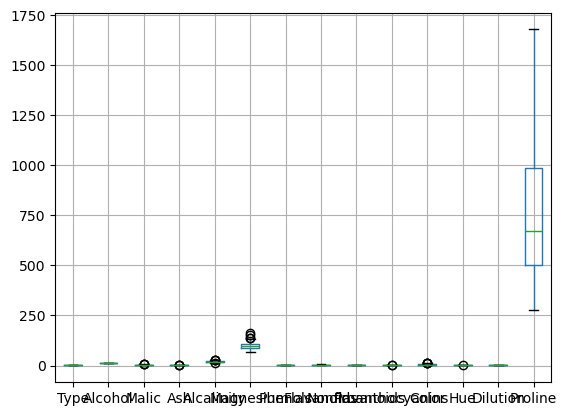

In [35]:
df.boxplot()
plt.show()

In [36]:
# no outliers in Type, Alcohol, Phenols, Flavanoids, Non Falvanoids, Dilution and Proline.
# For separate clarity,

In [37]:
Q1T= df['Type'].quantile(0.25)
Q3T=df['Type'].quantile(0.75)
IQRT=Q3T-Q1T
print(Q1T,Q3T,IQRT)

1.0 3.0 2.0


In [41]:
lower_extremeT=Q1T-1.5*IQRT
upper_extremeT=Q3T+1.5*IQRT
print(lower_extremeT,upper_extremeT)

-2.0 6.0


In [43]:
df_T_outliers= df[(df['Type']<lower_extremeT) | (df['Type']>upper_extremeT)]
df_T_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


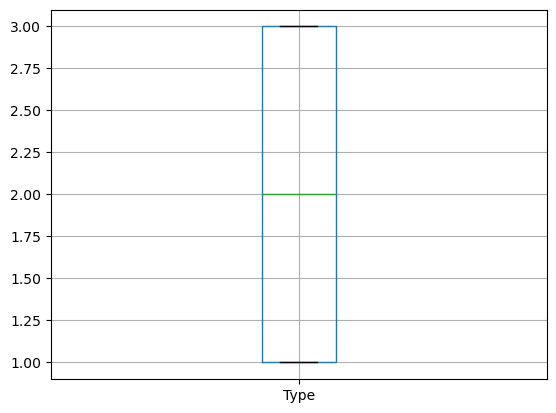

In [45]:
df.boxplot('Type')
plt.show()

In [47]:
Q1A= df['Alcohol'].quantile(0.25)
Q3A=df['Alcohol'].quantile(0.75)
IQRA=Q3A-Q1A
print(Q1A,Q3A,IQRA)

12.362499999999999 13.6775 1.3150000000000013


In [49]:
lower_extremeA=Q1A-1.5*IQRA
upper_extremeA=Q3A+1.5*IQRA
print(lower_extremeA,upper_extremeA)

10.389999999999997 15.650000000000002


In [51]:
df_A_outliers= df[(df['Alcohol']<lower_extremeA) | (df['Alcohol']>upper_extremeA)]
df_A_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


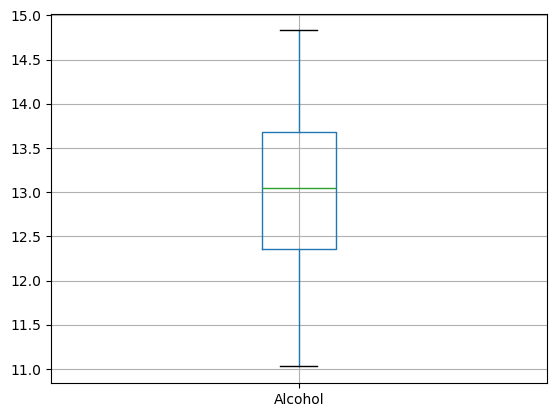

In [53]:
df.boxplot('Alcohol')
plt.show()

In [54]:
Q1M= df['Malic'].quantile(0.25)
Q3M=df['Malic'].quantile(0.75)
IQRM=Q3M-Q1M
print(Q1M,Q3M,IQRM)

1.6025 3.0825 1.48


In [57]:
lower_extremeM=Q1M-1.5*IQRM
upper_extremeM=Q3M+1.5*IQRM
print(lower_extremeM,upper_extremeM)

-0.6174999999999997 5.3025


In [59]:
df_M_outliers= df[(df['Malic']<lower_extremeM) | (df['Malic']>upper_extremeM)]
df_M_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


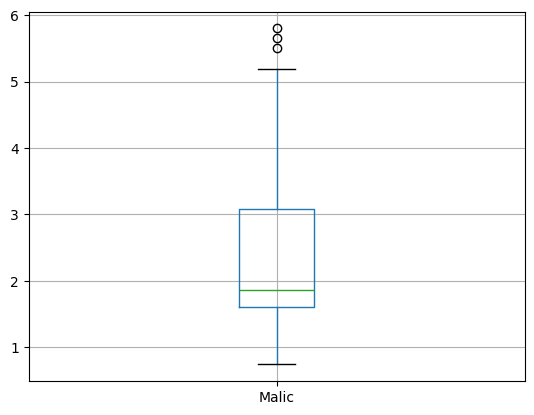

In [61]:
df.boxplot('Malic')
plt.show()

In [62]:
df_M_no_outliers= df[(df['Malic']>=lower_extremeM) & (df['Malic']<=upper_extremeM)]
df_M_no_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


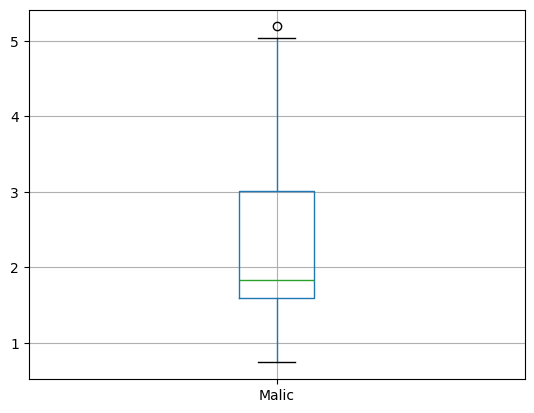

In [65]:
df_M_no_outliers.boxplot('Malic')
plt.show()

In [67]:
Q1As= df['Ash'].quantile(0.25)
Q3As=df['Ash'].quantile(0.75)
IQRAs=Q3As-Q1As
print(Q1As,Q3As,IQRAs)

2.21 2.5575 0.34750000000000014


In [69]:
lower_extremeAs=Q1As-1.5*IQRAs
upper_extremeAs=Q3As+1.5*IQRAs
print(lower_extremeAs,upper_extremeAs)

1.6887499999999998 3.0787500000000003


In [71]:
df_As_outliers= df[(df['Ash']<lower_extremeAs) | (df['Ash']>upper_extremeAs)]
df_As_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


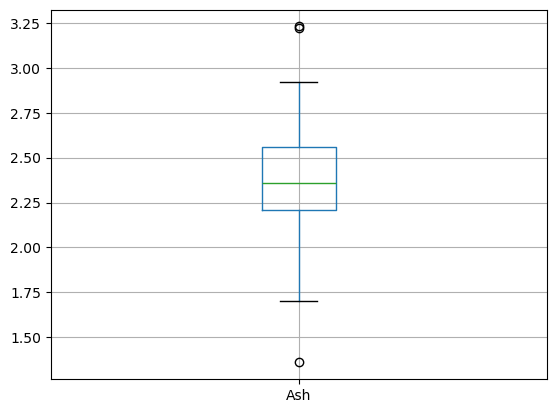

In [73]:
df.boxplot('Ash')
plt.show()

In [75]:
df_As_no_outliers= df[(df['Ash']>=lower_extremeAs) & (df['Ash']<=upper_extremeAs)]
df_As_no_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


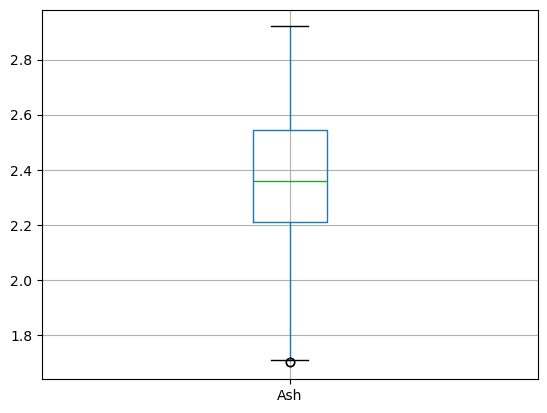

In [77]:
df_As_no_outliers.boxplot('Ash')
plt.show()

In [79]:
Q1Al= df['Alcalinity'].quantile(0.25)
Q3Al=df['Alcalinity'].quantile(0.75)
IQRAl=Q3Al-Q1Al
print(Q1Al,Q3Al,IQRAl)

17.2 21.5 4.300000000000001


In [81]:
lower_extremeAl=Q1Al-1.5*IQRAl
upper_extremeAl=Q3Al+1.5*IQRAl
print(lower_extremeAl,upper_extremeAl)

10.749999999999998 27.950000000000003


In [83]:
df_Al_outliers= df[(df['Alcalinity']<lower_extremeAl) | (df['Alcalinity']>upper_extremeAl)]
df_Al_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,2,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


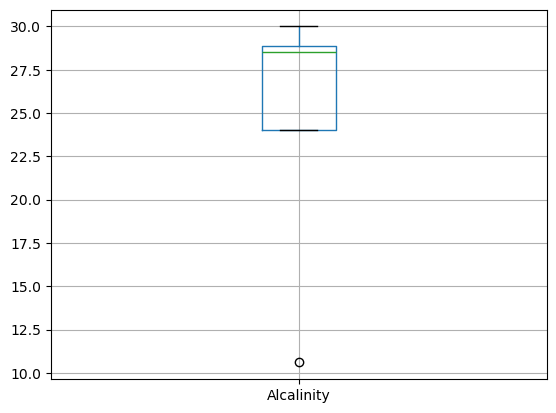

In [85]:
df_Al_outliers.boxplot('Alcalinity')
plt.show()

In [87]:
df_Al_no_outliers= df[(df['Alcalinity']>=lower_extremeAl) & (df['Alcalinity']<=upper_extremeAl)]
df_Al_no_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


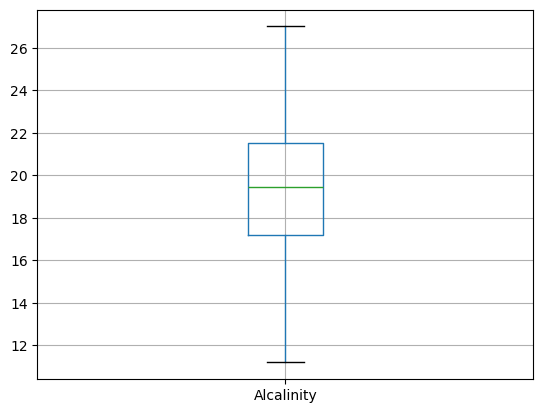

In [89]:
df_Al_no_outliers.boxplot('Alcalinity')
plt.show()

In [90]:
Q1Ma= df['Magnesium'].quantile(0.25)
Q3Ma=df['Magnesium'].quantile(0.75)
IQRMa=Q3Ma-Q1Ma
print(Q1Ma,Q3Ma,IQRMa)

88.0 107.0 19.0


In [93]:
lower_extremeMa=Q1Ma-1.5*IQRMa
upper_extremeMa=Q3Ma+1.5*IQRMa
print(lower_extremeMa,upper_extremeMa)

59.5 135.5


In [95]:
df_Ma_outliers= df[(df['Magnesium']<lower_extremeMa) | (df['Magnesium']>upper_extremeMa)]
df_Ma_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


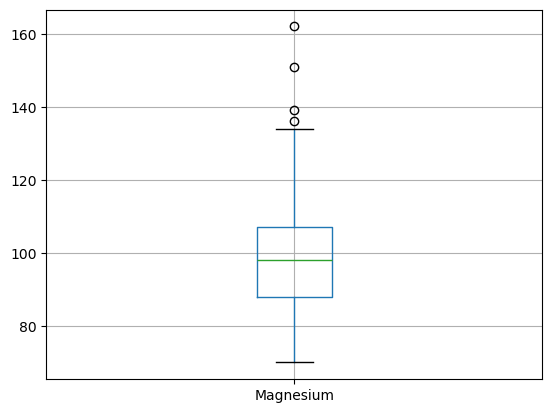

In [97]:
df.boxplot('Magnesium')
plt.show()

In [98]:
df1= df[(df['Magnesium']>=lower_extremeMa) & (df['Magnesium']<=upper_extremeMa)]
df1.reset_index(drop=True, inplace=True)

In [101]:
df1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
170,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
171,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
172,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


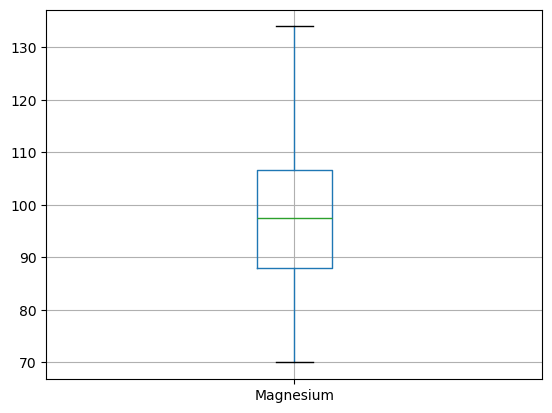

In [103]:
df1.boxplot('Magnesium')
plt.show()

In [105]:
Q1Ph= df['Phenols'].quantile(0.25)
Q3Ph=df['Phenols'].quantile(0.75)
IQRPh=Q3Ph-Q1Ph
print(Q1Ph,Q3Ph,IQRPh)

1.7425 2.8 1.0574999999999999


In [107]:
lower_extremePh=Q1Ph-1.5*IQRPh
upper_extremePh=Q3Ph+1.5*IQRPh
print(lower_extremePh,upper_extremePh)

0.15625000000000022 4.3862499999999995


In [109]:
df_Ph_outliers= df[(df['Phenols']<lower_extremePh) | (df['Phenols']>upper_extremePh)]
df_Ph_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


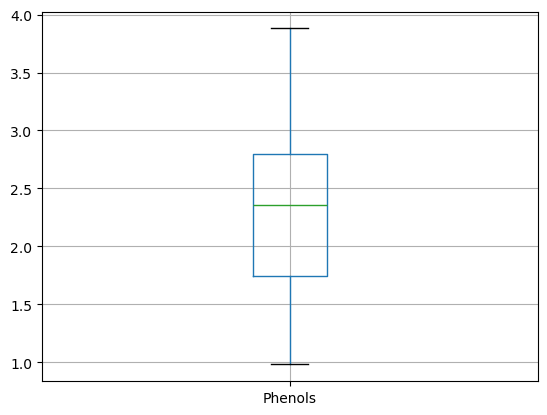

In [111]:
df.boxplot('Phenols')
plt.show()

In [112]:
Q1f= df['Flavanoids'].quantile(0.25)
Q3f=df['Flavanoids'].quantile(0.75)
IQRf=Q3f-Q1f
print(Q1f,Q3f,IQRf)

1.205 2.875 1.67


In [115]:
lower_extremef=Q1f-1.5*IQRf
upper_extremef=Q3f+1.5*IQRf
print(lower_extremef,upper_extremef)

-1.2999999999999998 5.38


In [117]:
df_f_outliers= df[(df['Flavanoids']<lower_extremef) | (df['Flavanoids']>upper_extremef)]
df_f_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


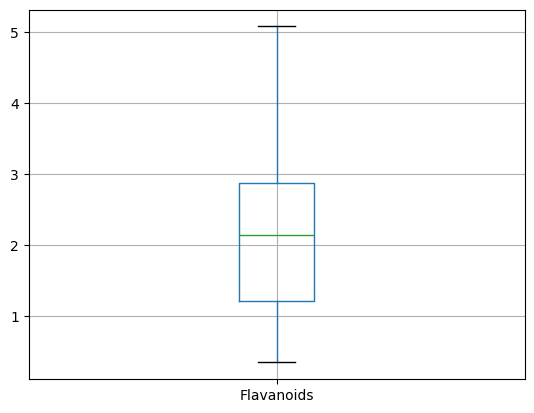

In [119]:
df.boxplot('Flavanoids')
plt.show()

In [120]:
Q1nf= df['Nonflavanoids'].quantile(0.25)
Q3nf=df['Nonflavanoids'].quantile(0.75)
IQRnf=Q3nf-Q1nf
print(Q1nf,Q3nf,IQRnf)

0.27 0.4375 0.16749999999999998


In [123]:
lower_extremenf=Q1nf-1.5*IQRnf
upper_extremenf=Q3nf+1.5*IQRnf
print(lower_extremenf,upper_extremenf)

0.018750000000000044 0.68875


In [125]:
df_nf_outliers= df[(df['Nonflavanoids']<lower_extremenf) | (df['Nonflavanoids']>upper_extremenf)]
df_nf_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline


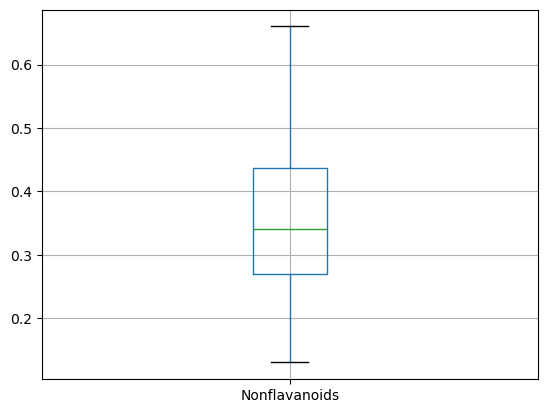

In [127]:
df.boxplot('Nonflavanoids')
plt.show()

In [128]:
Q1pr= df['Proanthocyanins'].quantile(0.25)
Q3pr=df['Proanthocyanins'].quantile(0.75)
IQRpr=Q3pr-Q1pr
print(Q1pr,Q3pr,IQRpr)

1.25 1.95 0.7


In [131]:
lower_extremepr=Q1pr-1.5*IQRpr
upper_extremepr=Q3pr+1.5*IQRpr
print(lower_extremepr,upper_extremepr)

0.20000000000000018 3.0


In [133]:
df_pr_outliers= df[(df['Proanthocyanins']<lower_extremepr) | (df['Proanthocyanins']>upper_extremepr)]
df_pr_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.6,1.16,2.63,937
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.9,0.75,2.81,562


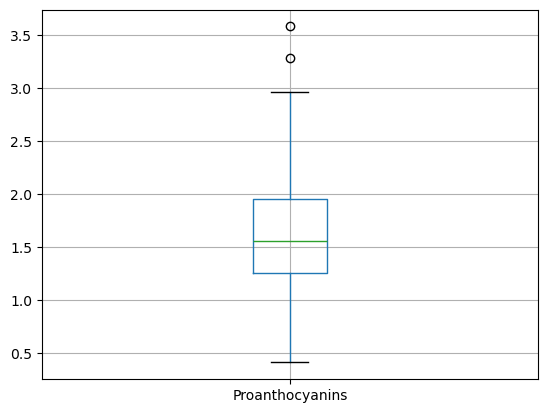

In [135]:
df.boxplot('Proanthocyanins')
plt.show()

In [137]:
df_pr_no_outliers= df[(df['Proanthocyanins']>=lower_extremepr) & (df['Proanthocyanins']<=upper_extremepr)]
df_pr_no_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


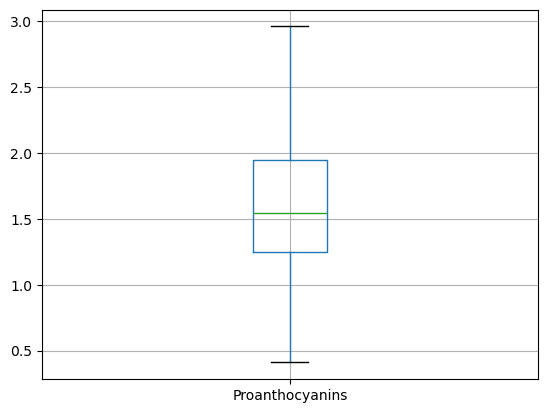

In [139]:
df_pr_no_outliers.boxplot('Proanthocyanins')
plt.show()

In [140]:
Q1clr= df['Color'].quantile(0.25)
Q3clr=df['Color'].quantile(0.75)
IQRclr=Q3clr-Q1clr
print(Q1clr,Q3clr,IQRclr)

3.2199999999999998 6.2 2.9800000000000004


In [143]:
lower_extremeclr=Q1clr-1.5*IQRclr
upper_extremeclr=Q3clr+1.5*IQRclr
print(lower_extremeclr,upper_extremeclr)

-1.2500000000000009 10.670000000000002


In [145]:
df_clr_outliers= df[(df['Color']<lower_extremeclr) | (df['Color']>upper_extremeclr)]
df_clr_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
151,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
159,3,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


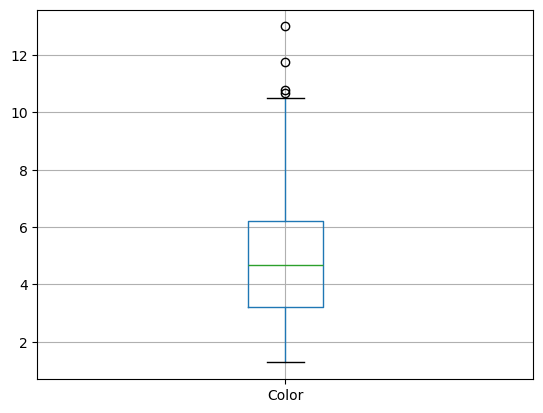

In [147]:
df.boxplot('Color')
plt.show()

In [148]:
df_clr_no_outliers= df[(df['Color']>=lower_extremeclr) & (df['Color']<=upper_extremeclr)]
df_clr_no_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


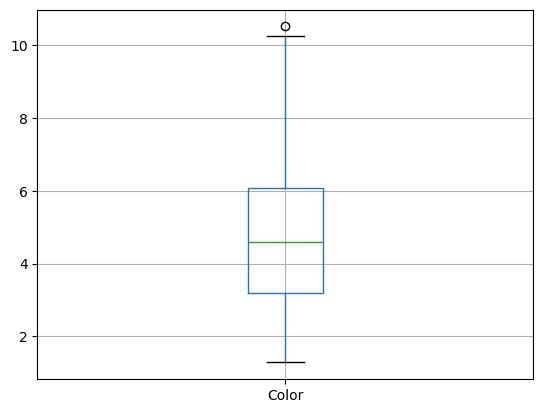

In [151]:
df_clr_no_outliers.boxplot('Color')
plt.show()

In [152]:
Q1hu= df['Hue'].quantile(0.25)
Q3hu=df['Hue'].quantile(0.75)
IQRhu=Q3hu-Q1hu
print(Q1hu,Q3hu,IQRhu)

0.7825 1.12 0.33750000000000013


In [155]:
lower_extremehu=Q1hu-1.5*IQRhu
upper_extremehu=Q3hu+1.5*IQRhu
print(lower_extremehu,upper_extremehu)

0.2762499999999998 1.6262500000000002


In [157]:
df_hu_outliers= df[(df['Hue']<lower_extremehu) | (df['Hue']>upper_extremehu)]
df_hu_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
115,2,11.03,1.51,2.2,21.5,85,2.46,2.17,0.52,2.01,1.9,1.71,2.87,407


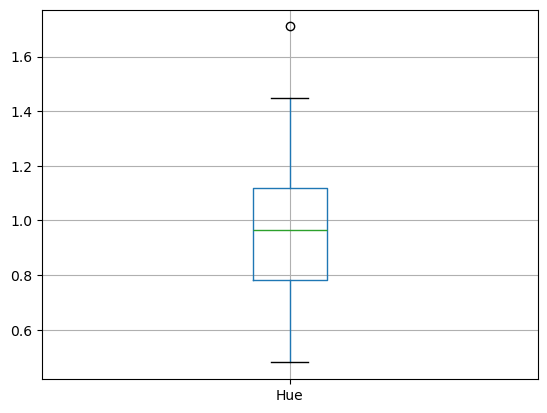

In [159]:
df.boxplot('Hue')
plt.show()

In [160]:
df_hu_no_outliers= df[(df['Hue']>=lower_extremehu) & (df['Hue']<=upper_extremehu)]
df_hu_no_outliers

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


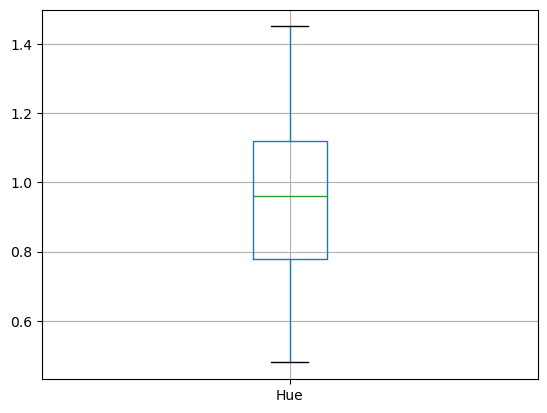

In [163]:
df_hu_no_outliers.boxplot('Hue')
plt.show()

In [164]:
target=df1[['Type']]
target

,Type
0,1
1,1
2,1
3,1
4,1
...,...
169,3
170,3
171,3
172,3


In [167]:
features=df1.drop(columns='Type')
features

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
170,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
171,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
172,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [169]:
# Histogram of features

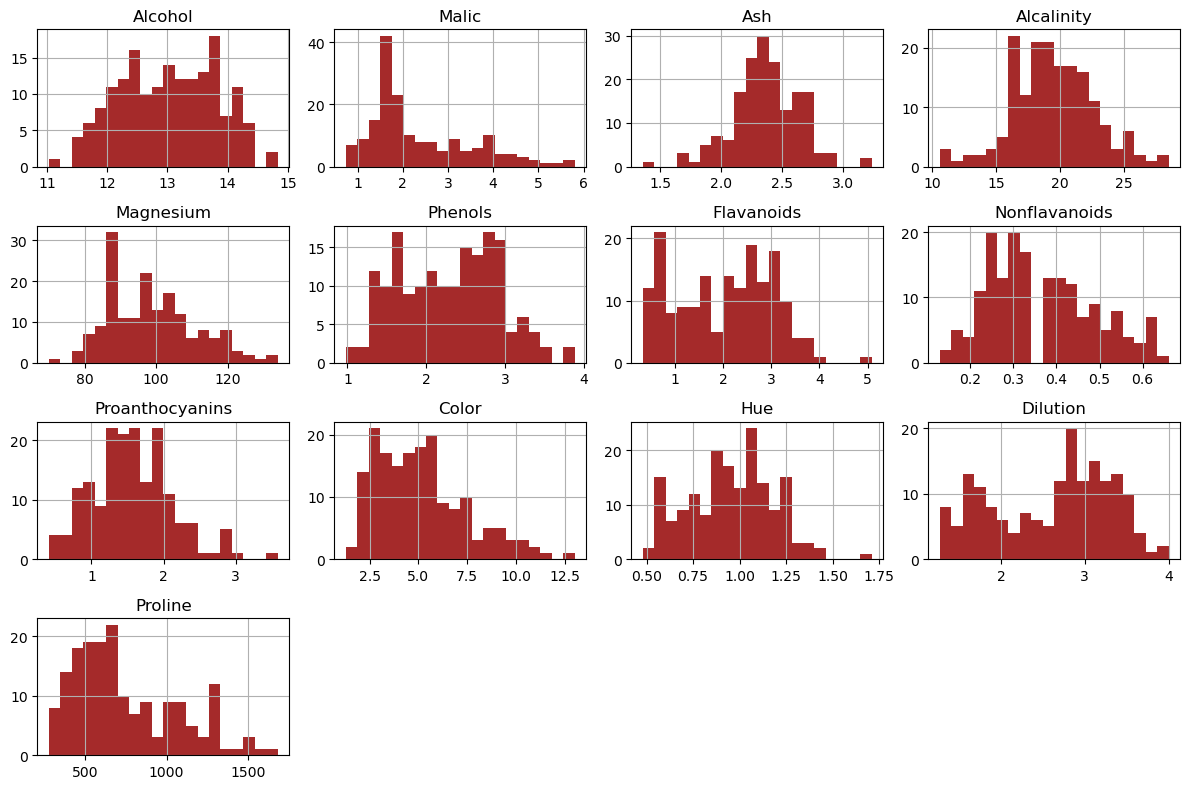

In [111]:
features.hist(figsize=(12,8),bins=20,color='brown')
plt.tight_layout()
plt.show()

In [112]:
# Density plot of features

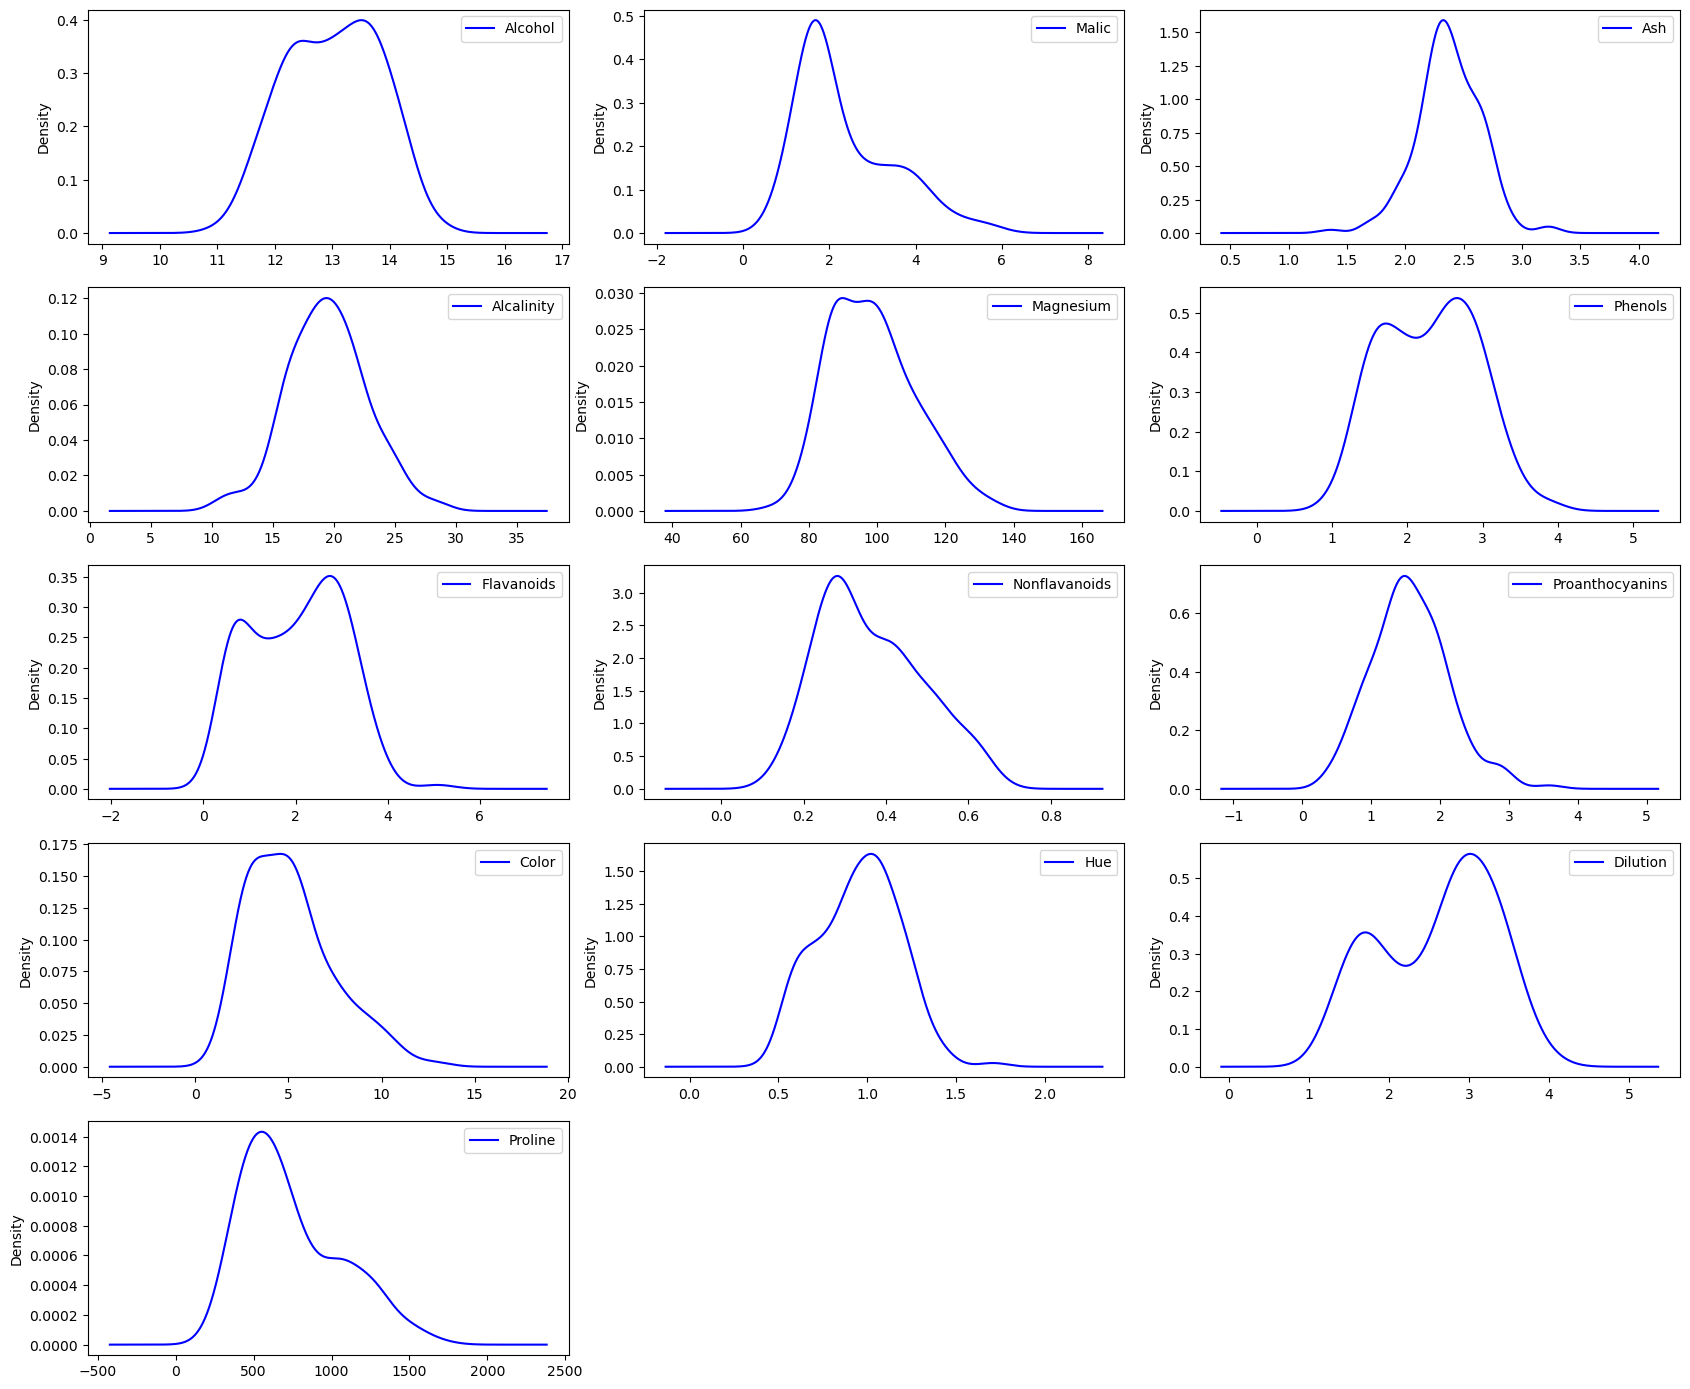

In [113]:
features.plot(kind='kde', subplots=True, layout=(5, 3), figsize=(17, 14), color='blue', sharex=False)
plt.tight_layout()
plt.show()

In [114]:
# 'sharex=False' means that each subplot will have its own independent x-axis scale. 
#This is useful when the range of values varies significantly between features, so each density plot can have its own appropriate x-axis limits.

In [115]:
# Correlation of features

In [116]:
corr=features.corr()
corr

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,0.081378,0.195529,-0.335518,0.375169,0.288248,0.235135,-0.171155,0.175678,0.541569,-0.059430,0.075126,0.651258
Malic,0.081378,1.000000,0.145580,0.297910,0.014495,-0.343611,-0.418414,0.282748,-0.193263,0.235743,-0.554711,-0.369255,-0.189661
Ash,0.195529,0.145580,1.000000,0.431211,0.426991,0.111842,0.103641,0.173673,0.059328,0.248391,-0.059127,0.002791,0.227262
Alcalinity,-0.335518,0.297910,0.431211,1.000000,-0.111739,-0.374863,-0.386767,0.393998,-0.199177,0.021987,-0.306390,-0.312595,-0.472175
Magnesium,0.375169,0.014495,0.426991,-0.111739,1.000000,0.241125,0.227376,-0.224801,0.109052,0.316070,-0.032308,0.044949,0.430275
Phenols,0.288248,-0.343611,0.111842,-0.374863,0.241125,1.000000,0.864844,-0.456581,0.651334,-0.053829,0.436407,0.701029,0.496166
Flavanoids,0.235135,-0.418414,0.103641,-0.386767,0.227376,0.864844,1.000000,-0.548854,0.689016,-0.174334,0.551904,0.791351,0.492574
Nonflavanoids,-0.171155,0.282748,0.173673,0.393998,-0.224801,-0.456581,-0.548854,1.000000,-0.359380,0.124417,-0.242459,-0.498065,-0.310925
Proanthocyanins,0.175678,-0.193263,0.059328,-0.199177,0.109052,0.651334,0.689016,-0.359380,1.000000,0.013470,0.273084,0.541256,0.334461
Color,0.541569,0.235743,0.248391,0.021987,0.316070,-0.053829,-0.174334,0.124417,0.013470,1.000000,-0.512687,-0.427974,0.326348


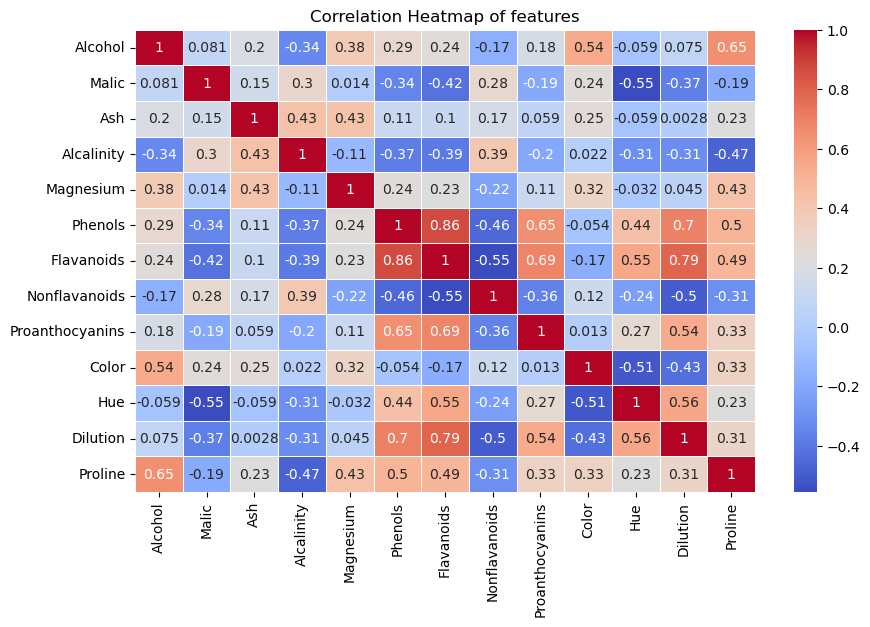

In [119]:
# correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(features.corr(),annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap of features')
plt.show()

In [120]:
# correlation Analysis
high_corr= corr[abs(corr)>0.5]
high_corr

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.541569,NaN,NaN,0.651258
Malic,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.554711,NaN,NaN
Ash,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alcalinity,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Magnesium,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Phenols,NaN,NaN,NaN,NaN,NaN,1.000000,0.864844,NaN,0.651334,NaN,NaN,0.701029,NaN
Flavanoids,NaN,NaN,NaN,NaN,NaN,0.864844,1.000000,-0.548854,0.689016,NaN,0.551904,0.791351,NaN
Nonflavanoids,NaN,NaN,NaN,NaN,NaN,NaN,-0.548854,1.000000,NaN,NaN,NaN,NaN,NaN
Proanthocyanins,NaN,NaN,NaN,NaN,NaN,0.651334,0.689016,NaN,1.000000,NaN,NaN,0.541256,NaN
Color,0.541569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.512687,NaN,NaN


### 2: Dimensionality Reduction with PCA

In [126]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

In [130]:
 # Standardize the features

In [132]:
scaler = StandardScaler()

In [134]:
scaled_data = pd.DataFrame(scaler.fit_transform(features),columns=features.columns)

In [136]:
scaled_data

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.496271,-0.581902,0.214593,-1.195045,2.295024,0.811496,1.028174,-0.681089,1.313463,0.231199,0.388564,1.846961,1.011574
1,0.230820,-0.519158,-0.859648,-2.550292,0.108888,0.571414,0.729206,-0.842656,-0.521709,-0.312548,0.432627,1.116285,0.964219
2,0.181676,0.000721,1.103620,-0.271014,0.189856,0.811496,1.207555,-0.519522,2.258304,0.248461,0.344501,0.793101,1.390417
3,1.668274,-0.366780,0.473892,-0.825433,1.161472,2.492071,1.456694,-1.004223,1.113593,1.163337,-0.404568,1.186542,2.321741
4,0.279964,0.206880,1.844476,0.468211,1.566312,0.811496,0.659447,0.207530,0.459472,-0.338441,0.388564,0.455865,-0.030246
...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.857402,2.949693,0.288678,0.314206,-0.295952,-0.981117,-1.413396,1.257716,-0.921450,1.120182,-1.373952,-1.216260,-0.014461
170,0.476539,1.390055,0.399807,1.084232,0.270824,-0.789052,-1.273877,0.530664,-0.285499,0.947564,-1.109575,-1.469187,0.017110
171,0.316822,1.721702,-0.415135,0.160201,1.728248,-1.125167,-1.333671,0.530664,-0.394519,2.199045,-1.594267,-1.469187,0.285457
172,0.193962,0.206880,-0.007664,0.160201,1.728248,-1.029134,-1.343636,1.338499,-0.194649,1.810655,-1.550204,-1.384878,0.301242


In [138]:
scaled_data.shape

(174, 13)

In [140]:
scaled_data.describe().round(3)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,174.000,174.000,174.000,174.000,174.000,174.000,174.000,174.000,174.000,174.000,174.000,174.000,174.000
mean,-0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000
std,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003,1.003
min,-2.435,-1.451,-3.749,-2.735,-2.320,-2.102,-1.682,-1.893,-2.103,-1.650,-2.079,-1.877,-1.473
25%,-0.789,-0.672,-0.554,-0.702,-0.863,-0.909,-0.900,-0.762,-0.590,-0.800,-0.757,-0.960,-0.772
50%,0.047,-0.434,-0.045,0.006,-0.094,0.099,0.106,-0.196,-0.049,-0.131,0.036,0.245,-0.267
75%,0.830,0.677,0.687,0.622,0.655,0.811,0.844,0.672,0.632,0.489,0.730,0.793,0.771
max,2.233,3.084,3.178,2.778,2.862,2.540,3.041,2.389,3.657,3.407,3.341,1.959,2.953


In [142]:
# Apply PCA and plot the explained variance

In [144]:
pca = PCA()

In [146]:
pca.fit(scaled_data)

PCA()

In [148]:
# Scree plot to visualize explained variance

In [150]:
pca.explained_variance_ratio_

array([0.36582583, 0.20171987, 0.11106453, 0.07420473, 0.05993078,
       0.04892003, 0.03526602, 0.02545796, 0.0221855 , 0.0187714 ,
       0.01599929, 0.01287508, 0.00777896])

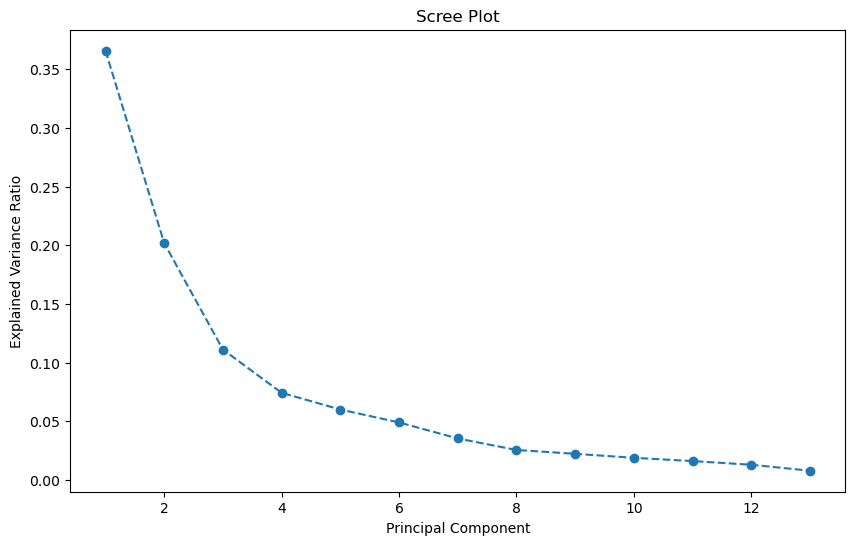

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

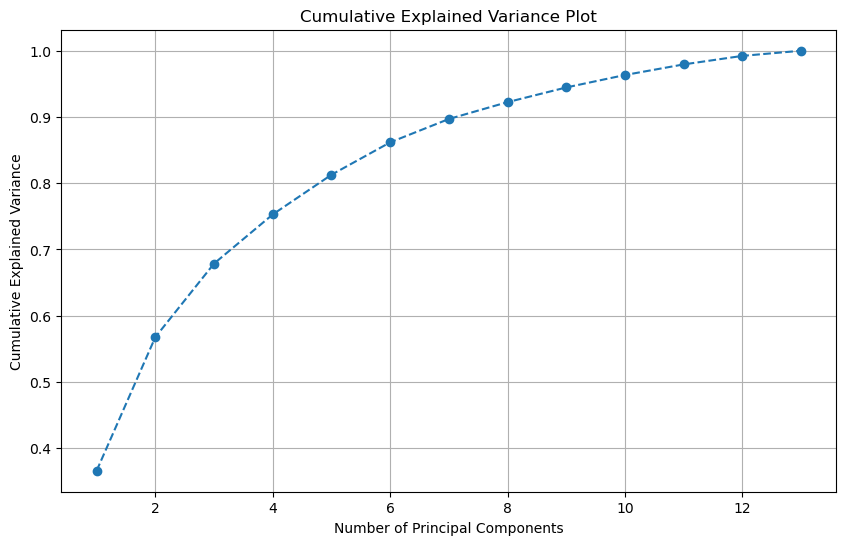

In [154]:
# Cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')
plt.grid(True)
plt.show()

In [156]:
cumulative_variance

array([0.36582583, 0.5675457 , 0.67861024, 0.75281497, 0.81274575,
       0.86166578, 0.8969318 , 0.92238976, 0.94457526, 0.96334666,
       0.97934595, 0.99222104, 1.        ])

In [158]:
# Choose the optimal number of components (e.g., where cumulative variance ~ 90%) and transform the data

In [160]:
optimal_components = np.argmax(cumulative_variance >= 0.9) + 1  # e.g., 90% threshold

In [162]:
optimal_components

8

In [164]:
pca = PCA(n_components=optimal_components)

In [166]:
pca

PCA(n_components=8)

In [168]:
principal_components = pca.fit_transform(scaled_data)

In [170]:
principal_components

array([[ 3.43579047, -1.57381337, -0.06770203, ..., -0.22345474,
         0.74393466,  0.01037672],
       [ 2.29143124,  0.41233765, -2.02504608, ..., -0.76147251,
         0.21349199,  0.81454836],
       [ 2.60856649, -0.9411516 ,  1.06265822, ...,  0.17557093,
         0.22852709, -0.79185259],
       ...,
       [-2.55048243, -2.97414074, -0.95179582, ...,  0.22638684,
         1.08739749, -0.39496191],
       [-2.27338667, -2.523078  , -0.52123381, ...,  0.97824841,
         1.31712542, -0.00484466],
       [-3.10311886, -2.73909341,  0.94238277, ..., -0.10809558,
        -0.43321933,  0.21318692]])

In [172]:
# Convert the principal components into a DataFrame if needed

In [174]:
pc_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(optimal_components)])
print(pc_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.435790 -1.573813 -0.067702 -0.245284  0.726954 -0.223455  0.743935   
1  2.291431  0.412338 -2.025046 -0.511015  0.413791 -0.761473  0.213492   
2  2.608566 -0.941152  1.062658  0.828492 -0.585915  0.175571  0.228527   
3  3.895085 -2.658974 -0.177954  0.537426 -0.179092  0.176237 -0.158169   
4  1.077423 -1.027605  2.104991 -0.500784  0.513310 -0.404756  0.557690   

        PC8  
0  0.010377  
1  0.814548  
2 -0.791853  
3  0.852468  
4  0.150126  


In [176]:
pc_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,3.435790,-1.573813,-0.067702,-0.245284,0.726954,-0.223455,0.743935,0.010377
1,2.291431,0.412338,-2.025046,-0.511015,0.413791,-0.761473,0.213492,0.814548
2,2.608566,-0.941152,1.062658,0.828492,-0.585915,0.175571,0.228527,-0.791853
3,3.895085,-2.658974,-0.177954,0.537426,-0.179092,0.176237,-0.158169,0.852468
4,1.077423,-1.027605,2.104991,-0.500784,0.513310,-0.404756,0.557690,0.150126
...,...,...,...,...,...,...,...,...
169,-3.260918,-2.186142,-0.435829,1.004913,-0.446041,-1.651553,0.073559,-0.073259
170,-2.524866,-1.814043,0.171162,0.451223,0.027275,-0.081498,-0.087271,-0.553846
171,-2.550482,-2.974141,-0.951796,0.466950,0.807751,0.226387,1.087397,-0.394962
172,-2.273387,-2.523078,-0.521234,-0.490112,0.116829,0.978248,1.317125,-0.004845


In [178]:
df1.shape

(174, 14)

In [180]:
pc_df.shape

(174, 8)

In [182]:
features1=pc_df

### 3: Clustering with Original Data

In [185]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [187]:
clusters=range(1,11)

In [189]:
import warnings
warnings.filterwarnings('ignore')
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

In [190]:
inertia

[17487948.195218615,
 4400008.65875201,
 2564223.2369568725,
 1321208.2474019453,
 968870.2145566235,
 659349.8863822836,
 642150.5523762426,
 304507.05248916853,
 264521.2157870006,
 241123.24904698457]

In [191]:
# This suggests that 4 clusters might be the optimal choice according to the elbow method, as the inertia drop slows down considerably after this point.

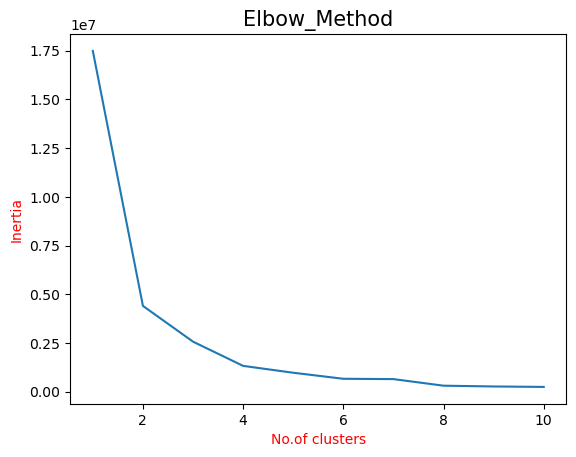

In [195]:
import matplotlib.pyplot as plt
plt.plot(clusters,inertia)
plt.xlabel('No.of clusters',size=10,color='red')
plt.ylabel('Inertia',size=10,color='red')
plt.title('Elbow_Method',size=15,color='black');
plt.show()

In [196]:
kmeans=KMeans(n_clusters=2)

In [199]:
kmeans

KMeans(n_clusters=2)

In [201]:
cluster=kmeans.fit(features)

In [203]:
cluster

KMeans(n_clusters=2)

In [205]:
scaled_data['clusters']=cluster.labels_

In [207]:
scaled_data[scaled_data.clusters==0]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
4,0.279964,0.206880,1.844476,0.468211,1.566312,0.811496,0.659447,0.207530,0.459472,-0.338441,0.388564,0.455865,-0.030246,0
19,0.771401,0.664016,0.696149,-1.318250,1.404376,0.651441,0.998277,-1.569707,0.168751,-0.001835,0.036061,1.060079,0.317027,0
20,1.287410,-0.653610,-0.341049,-1.071841,2.214056,1.131606,1.137795,-1.004223,0.968232,0.235515,0.608878,1.551880,0.111821,0
21,-0.100900,1.291457,1.029534,-0.271014,0.270824,0.187282,0.380411,-0.923439,0.750192,-0.260762,0.344501,1.284902,0.080250,0
24,0.599398,-0.492268,0.881363,0.160201,-0.214984,0.379348,0.579722,-0.681089,0.168751,-0.683677,0.741067,1.706446,0.317027,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.857402,2.949693,0.288678,0.314206,-0.295952,-0.981117,-1.413396,1.257716,-0.921450,1.120182,-1.373952,-1.216260,-0.014461,0
170,0.476539,1.390055,0.399807,1.084232,0.270824,-0.789052,-1.273877,0.530664,-0.285499,0.947564,-1.109575,-1.469187,0.017110,0
171,0.316822,1.721702,-0.415135,0.160201,1.728248,-1.125167,-1.333671,0.530664,-0.394519,2.199045,-1.594267,-1.469187,0.285457,0
172,0.193962,0.206880,-0.007664,0.160201,1.728248,-1.029134,-1.343636,1.338499,-0.194649,1.810655,-1.550204,-1.384878,0.301242,0


In [209]:
scaled_data[scaled_data.clusters==0].shape

(121, 14)

In [211]:
scaled_data[scaled_data.clusters==1]

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters
0,1.496271,-0.581902,0.214593,-1.195045,2.295024,0.811496,1.028174,-0.681089,1.313463,0.231199,0.388564,1.846961,1.011574,1
1,0.230820,-0.519158,-0.859648,-2.550292,0.108888,0.571414,0.729206,-0.842656,-0.521709,-0.312548,0.432627,1.116285,0.964219,1
2,0.181676,0.000721,1.103620,-0.271014,0.189856,0.811496,1.207555,-0.519522,2.258304,0.248461,0.344501,0.793101,1.390417,1
3,1.668274,-0.366780,0.473892,-0.825433,1.161472,2.492071,1.456694,-1.004223,1.113593,1.163337,-0.404568,1.186542,2.321741,1
5,1.459413,-0.537085,0.288678,-1.318250,1.080504,1.563753,1.357038,-0.196388,0.732022,0.710214,0.432627,0.343454,2.227030,1
6,1.692846,-0.438487,0.288678,-1.503056,-0.214984,0.331332,0.490032,-0.519522,0.750192,0.062896,0.300438,1.369211,1.721906,1
7,1.287410,-0.187511,0.881363,-0.579024,1.809216,0.491387,0.480067,-0.438738,-0.576219,-0.023413,0.476690,1.369211,1.737691,1
8,2.233426,-0.644647,-0.748520,-1.687862,-0.134016,0.811496,0.948449,-0.600305,0.750192,0.041319,0.564815,0.343454,0.948433,1
9,1.041691,-0.904586,-0.378092,-1.071841,-0.053048,1.099595,1.117864,-1.165790,0.513982,0.913041,0.256375,1.327057,0.948433,1
10,1.336554,-0.178548,-0.266964,-0.455820,0.513728,1.051578,1.287279,-1.165790,1.476993,0.278669,1.313885,0.793101,2.416452,1


In [213]:
silhouette_score(features,cluster.labels_)

0.6640133418744512

### 4: Clustering with PCA data

In [216]:
## Elbow method to fing the optimum value of clusters

In [218]:
clusters=range(1,11)

In [220]:
inertia=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(pc_df)
    inertia.append(kmeans.inertia_)

In [221]:
inertia

[2086.4456330139615,
 1440.5695076336488,
 1050.4858837622764,
 953.5151499553657,
 896.7412692375697,
 858.7783637832918,
 792.8988644536055,
 760.8139523192738,
 701.6343488512422,
 700.5558779501796]

In [222]:
# Here, we see a sharp decline in inertia initially, with a notable flattening around 3 or 4 clusters. 
# By plotting the elbow method

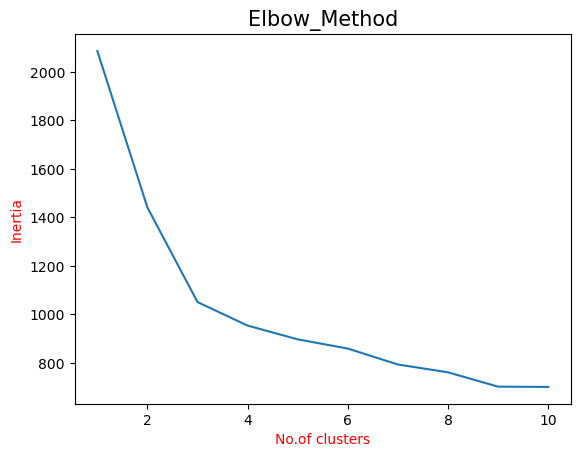

In [223]:
import matplotlib.pyplot as plt
plt.plot(clusters,inertia)
plt.xlabel('No.of clusters',size=10,color='red')
plt.ylabel('Inertia',size=10,color='red')
plt.title('Elbow_Method',size=15,color='black');
plt.show()

In [227]:
kmeans=KMeans(n_clusters=3)

In [230]:
kmeans

KMeans(n_clusters=3)

In [232]:
cluster=kmeans.fit(pc_df)

In [234]:
pc_df['clusters']=cluster.labels_

In [236]:
pc_df[pc_df.clusters==0]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,clusters
80,-2.501571,0.175854,0.451146,0.788457,-1.450888,-0.770993,0.382495,-0.346265,0
126,-1.275626,-0.485364,-1.127248,-1.458864,2.501904,1.053066,0.312228,-0.359065,0
127,-2.336719,-0.515144,-0.740867,-0.326135,1.725963,0.229342,-0.532672,-0.443549,0
128,-2.924554,-0.361756,-0.202420,-0.342494,1.274206,0.972658,-1.217624,-0.459273,0
129,-2.112140,-0.521795,-0.484844,0.027257,2.189511,0.076176,-0.610459,-0.640031,0
130,-2.319435,0.530408,-1.112410,-0.772640,-1.522735,0.867558,0.734872,0.668720,0
131,-3.000824,-0.366406,-1.130186,-0.697057,-1.089179,0.260169,0.953805,0.562090,0
132,-3.878645,-0.175962,0.169615,-0.089308,-0.100464,-1.447816,0.260498,-0.298837,0
133,-3.898801,-0.731410,1.673009,0.482540,-0.520964,-1.646355,0.644620,-0.237071,0
134,-3.035867,-0.285820,-1.104408,-0.125734,-1.036232,-0.980922,0.123156,0.176561,0


In [238]:
pc_df[pc_df.clusters==1]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,clusters
59,-0.924687,3.101374,-4.632232,-1.183526,0.880370,0.022025,0.577282,0.469009,1
60,-1.525820,1.282091,-0.870301,-3.056375,-0.777712,-0.408419,1.347768,0.605428,1
61,-1.798941,0.758785,-1.621912,-1.515070,-0.316602,0.555806,1.031567,0.822852,1
62,0.035439,1.315854,-1.839357,-1.349671,0.089400,-0.238079,-0.717535,-0.033876,1
63,2.053879,2.069034,0.011682,0.673989,0.054207,1.121578,-0.298930,0.369708,1
...,...,...,...,...,...,...,...,...,...
121,-0.117105,2.202540,0.433399,0.900391,0.097810,0.014965,-0.246219,1.203916,1
122,0.048007,1.375037,0.707798,1.242815,-0.335779,1.028430,-0.146732,1.318432,1
123,-1.638844,1.170425,3.419137,-0.176974,-0.928035,0.497720,0.073606,-0.062102,1
124,-0.512029,1.976013,1.340682,0.722538,-0.202439,0.691800,-0.295191,0.053588,1


In [240]:
pc_df[pc_df.clusters==2]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,clusters
0,3.435790,-1.573813,-0.067702,-0.245284,0.726954,-0.223455,0.743935,0.010377,2
1,2.291431,0.412338,-2.025046,-0.511015,0.413791,-0.761473,0.213492,0.814548,2
2,2.608566,-0.941152,1.062658,0.828492,-0.585915,0.175571,0.228527,-0.791853,2
3,3.895085,-2.658974,-0.177954,0.537426,-0.179092,0.176237,-0.158169,0.852468,2
4,1.077423,-1.027605,2.104991,-0.500784,0.513310,-0.404756,0.557690,0.150126,2
5,3.178439,-2.057741,-0.616410,-0.549195,-0.604996,-0.155846,0.428061,0.233637,2
6,2.556171,-0.997140,-0.979442,-0.142195,-0.738799,-0.797792,-0.689589,-0.090158,2
7,2.145117,-1.710302,0.158955,-1.389925,0.770515,-1.085288,-0.249247,0.388792,2
8,2.621825,-0.738277,-1.784921,0.013346,-0.784043,-0.381835,-0.298811,-0.160763,2
9,2.842361,-0.632989,-0.991771,0.291418,-0.229492,0.420655,-0.683753,0.520809,2


In [242]:
pc_df[pc_df.clusters==0].shape

(49, 9)

In [244]:
pc_df[pc_df.clusters==1].shape

(65, 9)

In [246]:
pc_df[pc_df.clusters==2].shape

(60, 9)

In [248]:
silhouette_score(pc_df,cluster.labels_)

0.3367517361710877

In [250]:
# Hierarchial Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [252]:
# with chosen linkage method
Z = linkage(pc_df, method='ward')

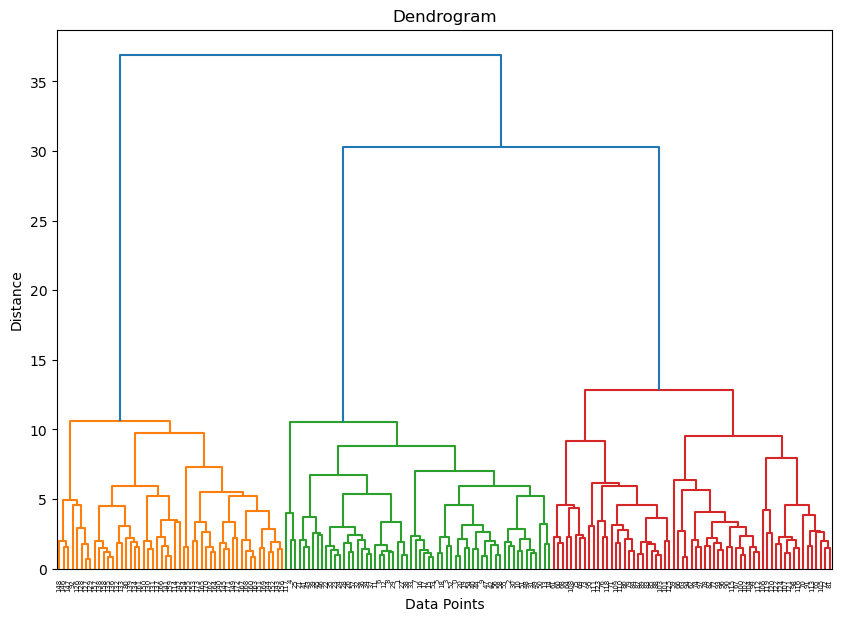

In [254]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [255]:
agg=AgglomerativeClustering(n_clusters=3,linkage='ward')

In [256]:
clusters=agg.fit(pc_df)

In [257]:
clusters.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [258]:
silhouette_score(pc_df,clusters.labels_)

0.3349710445860485

In [264]:
# conclusion

In [ ]:
# 1. Key Findings and Insights from the Assignment
# In this assignment, we applied Principal Component Analysis (PCA) and clustering techniques to understand and segment our dataset.

# Dimensionality Reduction: PCA effectively reduced the number of features while retaining most of the data's variance. This allowed us to simplify the data structure and visualize patterns in a lower-dimensional space, making the analysis more manageable and reducing potential noise.
# Cluster Formation: By using clustering algorithms like K-Means and Hierarchical Clustering, we were able to identify distinct groups within the data. These clusters represent subsets of data points that share similar characteristics, offering insight into natural groupings and trends.

In [ ]:
# 2. Practical Implications of Using PCA and Clustering in Data Analysis
# PCA: PCA is valuable in handling high-dimensional data by reducing the feature space, making it easier to visualize and interpret. By focusing on the principal components, analysts can identify the main directions of variance in the data, improving both model performance and interpretability in tasks like regression, classification, and clustering.

# Clustering: Clustering is crucial for segmenting data without prior labels. It is used extensively in customer segmentation, anomaly detection, image segmentation, and document categorization. The ability to group similar data points enables targeted strategies for each cluster, such as marketing efforts, recommendations, or resource allocation.

In [ ]:
# 3. Recommendations for When to Use Each Technique
# Use PCA when dealing with high-dimensional data where you suspect that most of the variance can be captured with fewer features.
# Apply PCA if you need to visualize high-dimensional data in 2D or 3D or to preprocess data for other machine learning tasks.
# PCA is also helpful if multicollinearity (highly correlated features) is present, as it generates uncorrelated components.